In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np

In [2]:
fracs = [0.05, 0.1, 0.25, 0.5, 1.]
names = ['005.csv', '010.csv', '025.csv', '050.csv', '100.csv']
path = '../results/l1eq0/'

In [3]:
mnames = {'finetuned_ridgeslowverybig_without_augmentations': 'tuned_0',
          'finetuned_ridgeslowverybig_with_augmentations': 'tuned_1',
          'finetuned_ridgeslowverybig_with_3augmentations':'tuned_3',
          'finetuned_ridgeslowverybig_with_6augmentations':'tuned_6',
          'frozen_ridgeslowverybig_without_augmentations': 'frozen_0',
          'frozen_ridgeslowverybig_with_augmentations': 'frozen_1',
          'frozen_ridgeslowverybig_with_3augmentations':'frozen_3',
          'frozen_ridgeslowverybig_with_6augmentations':'frozen_6',
          'random': 'random',
          'trained': 'trained'}

In [4]:
res = defaultdict(list)

In [5]:
for frac, name in zip(fracs, names):
    df = pd.read_csv(path+name)
    for key, val in df[['group', 'seed', 'test_total_r2']].groupby('group'):
        gdf = val[['seed', 'test_total_r2']]
        gdf['frac'] = frac
        res[key] += [gdf]

In [12]:
res

defaultdict(list,
            {'finetuned_ridgeslowverybig_with_3augmentations': [    seed  test_total_r2  frac
              6     50       0.255542  0.05
              10    43       0.251252  0.05
              27    44       0.228528  0.05
              43    42       0.213636  0.05
              44    45       0.211775  0.05
              58    49       0.194268  0.05
              59    47       0.192656  0.05
              62    51       0.191163  0.05
              65    48       0.184299  0.05
              69    46       0.181295  0.05,
                  seed  test_total_r2  frac
              1     48       0.390687   0.1
              2     50       0.378159   0.1
              20    44       0.330196   0.1
              25    49       0.326241   0.1
              31    46       0.320870   0.1
              34    43       0.320157   0.1
              47    47       0.305253   0.1
              54    45       0.295534   0.1
              57    51       0.292228   0.1
       

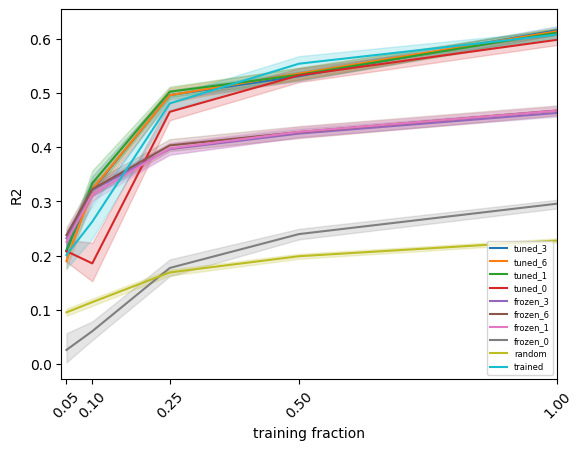

In [6]:
for key, val in res.items():
    if True:
        gdf = pd.concat(val, axis=0)
        gdf.reset_index(inplace=True, drop=True)
        sns.lineplot(data=gdf, x='frac', y='test_total_r2', label=mnames[key])
    plt.xlim(0.04, 1)
    plt.xticks([0.05, 0.10, 0.25, 0.5, 1.], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    plt.legend(loc=0, prop={'size': 6})
    plt.savefig('../results/l1eq0/complete.pdf', bbox_inches='tight')

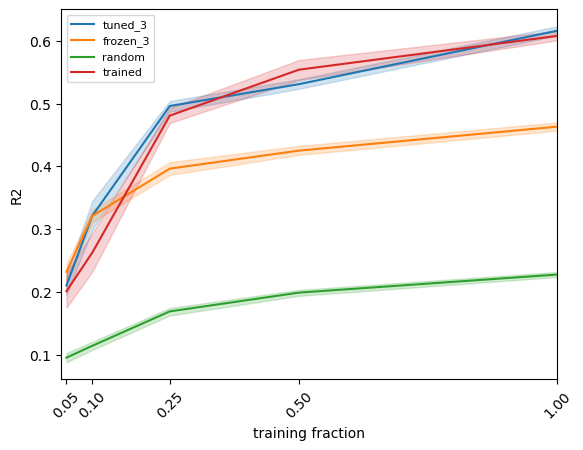

In [11]:
for key, val in res.items():
    if mnames[key] in ['random', 'trained', 'tuned_3', 'frozen_3']:
        gdf = pd.concat(val, axis=0)
        gdf.reset_index(inplace=True, drop=True)
        sns.lineplot(data=gdf, x='frac', y='test_total_r2', label=mnames[key])
    plt.xlim(0.04, 1)
    plt.xticks([0.05, 0.10, 0.25, 0.5, 1.], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    plt.legend(loc=0, prop={'size': 8})
    plt.savefig('../results/l1eq0/3aug.pdf', bbox_inches='tight')

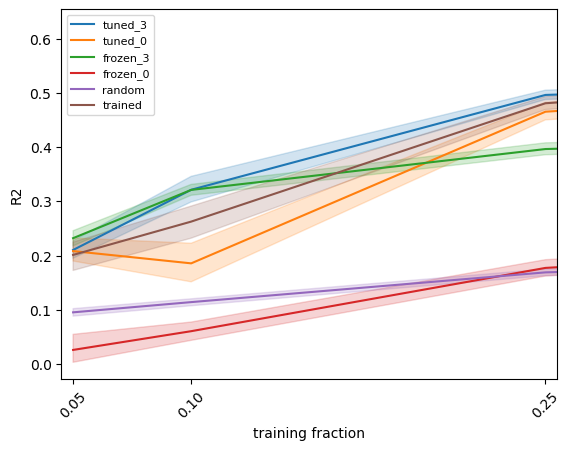

In [8]:
for key, val in res.items():
    if mnames[key] in ['random', 'trained', 'tuned_3', 'frozen_3', 'tuned_0', 'frozen_0']:
        gdf = pd.concat(val, axis=0)
        gdf.reset_index(inplace=True, drop=True)
        sns.lineplot(data=gdf, x='frac', y='test_total_r2', label=mnames[key])
    plt.xlim(0.045, 0.255)
    plt.xticks([0.05, 0.10, 0.25], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    plt.legend(loc=0, prop={'size': 8})
    plt.savefig('../results/l1eq0/3aug_025.pdf', bbox_inches='tight')

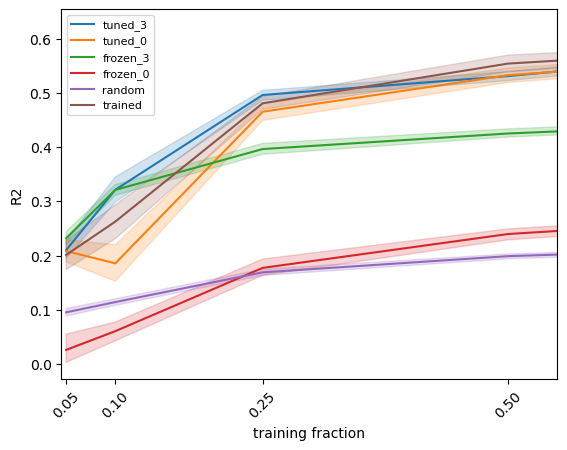

In [9]:
for key, val in res.items():
    if mnames[key] in ['random', 'trained', 'tuned_3', 'frozen_3', 'tuned_0', 'frozen_0']:
        gdf = pd.concat(val, axis=0)
        gdf.reset_index(inplace=True, drop=True)
        sns.lineplot(data=gdf, x='frac', y='test_total_r2', label=mnames[key])
    plt.xlim(0.045, 0.55)
    plt.xticks([0.05, 0.10, 0.25, 0.5], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    plt.legend(loc=0, prop={'size': 8})
    plt.savefig('../results/l1eq0/3aug_05.pdf', bbox_inches='tight')